# Zobaczymy jak dokonywać transformacji tekstu. 

# Zad

Na początek wczytujemy korpus z dysku. Użyjemy przykład stworzonego w poprzednim notebook-u.

In [4]:
corpus = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

# Zad 
Dokonujemy transformacji tfidf w

```python
from sklearn.feature_extraction.text import TfidfVectorizer
```

In [12]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

def my_tokenizer(sent):
    tokens = word_tokenize(sent)
    stemmer = PorterStemmer()
    res = [stemmer.stem(word) for word in tokens]
    return res 


vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))
vectorizer.fit(corpus)

tfidf_matrix = vectorizer.transform(corpus)

# Zad
Wczytujemy dane po transformacie to **gensis**

In [14]:
from gensim import corpora, models, similarities, matutils
import numpy as np

corpus_sparse = matutils.Sparse2Corpus(tfidf_matrix, documents_columns=False)
dictionary_list = vectorizer.get_feature_names()
dictionary_sparse_dict = {i:j for i,j in enumerate(dictionary_list)}

dictionary = corpora.Dictionary.from_corpus(corpus_sparse, id2word=dictionary_sparse_dict)

# Możemy dokonać transformacji LSI

In [23]:
# model = models.LdaModel(corpus=corpus_sparse, id2word=dictionary, num_topics=30

lsi = models.LsiModel(corpus_sparse, id2word=dictionary, num_topics=2) # initialize an LSI transformation
corpus_lsi = lsi[corpus_sparse] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

Wypiszemy jak wyglądają wybrane kierunki.

In [24]:
lsi.print_topics(2)

[(0,
  '0.572*"romeo" + 0.536*"juliet" + 0.472*"dagger" + 0.282*"die" + 0.270*"happi" + 0.069*"’" + 0.037*"new-hampshir" + 0.034*"motto" + 0.034*"free" + 0.034*"\'live"'),
 (1,
  '0.493*"new-hampshir" + 0.463*"’" + 0.380*"know" + 0.380*"new-england" + 0.236*"die" + 0.231*"motto" + 0.231*"free" + 0.231*"\'live" + -0.165*"juliet" + -0.094*"happi"')]

In [25]:
lsi.print_topics(num_topics=2, num_words=4)

[(0, '0.572*"romeo" + 0.536*"juliet" + 0.472*"dagger" + 0.282*"die"'),
 (1, '0.493*"new-hampshir" + 0.463*"’" + 0.380*"know" + 0.380*"new-england"')]

In [26]:
lsi.get_topics()

array([[ 0.03446732,  0.47190249,  0.28152494,  0.03446732,  0.27043539,
         0.53646271,  0.01141615,  0.03446732,  0.01141615,  0.0370185 ,
         0.57199406,  0.06893465],
       [ 0.23125355, -0.02659373,  0.23559612,  0.23125355, -0.09372401,
        -0.16459705,  0.37998461,  0.23125355,  0.37998461,  0.4931431 ,
        -0.03995889,  0.46250709]])

### PYTANIE: z jakimi słowami wiąże się pierwszy temat a z jakimi drugi?

# Zad

Proszę posortować zdania najbardziej pasujące do danego tematu. 

In [47]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort(numpy_corpus[topic_ind,:])[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 0.7837973   0.7144695   0.76523244  0.172933    0.0323669 ]
 [-0.14464289 -0.16344513  0.09759731  0.76587814  0.71112883]]
Romeo and Juliet
Romeo died by dagger
Juliet: O happy dagger
'Live free or die', that’s the New-Hampshire’s motto
Did you know, New-Hampshire is in New-England


In [48]:
topic_ind = 1
docs = np.argsort(numpy_corpus[topic_ind,:])[::-1]
for x in docs[:5]:
    print(corpus[x])   

'Live free or die', that’s the New-Hampshire’s motto
Did you know, New-Hampshire is in New-England
Romeo died by dagger
Romeo and Juliet
Juliet: O happy dagger


In [29]:
documents = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

In [30]:
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[topic_ind,:]) )[::-1]
for x in docs[:5]:
#     print(corpus[x])
    print(documents[x])

Romeo and Juliet
Romeo died by dagger
Juliet: O happy dagger
'Live free or die', that’s the New-Hampshire’s motto
Did you know, New-Hampshire is in New-England


In [31]:
topic_ind = 1
docs = np.argsort( np.abs(numpy_corpus[topic_ind,:]) )[::-1]
for x in docs[:5]:
#     print(corpus[x])
    print(documents[x])

'Live free or die', that’s the New-Hampshire’s motto
Did you know, New-Hampshire is in New-England
Juliet: O happy dagger
Romeo and Juliet
Romeo died by dagger


# Zad
Zobaczmy jak wygląda reprezentacja naszych dokumentów.

In [32]:
docs_red = numpy_corpus.T
docs_red

array([[ 0.7837973 , -0.14464289],
       [ 0.7144695 , -0.16344513],
       [ 0.76523244,  0.09759731],
       [ 0.172933  ,  0.76587814],
       [ 0.0323669 ,  0.71112883]], dtype=float32)

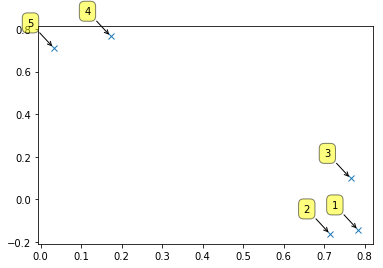

In [33]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [43]:
query = ["dies", "dagger"]
query_red = vectorizer.transform( query) 
print(query_red)

new_vec_tf = matutils.Sparse2Corpus(query_red, documents_columns=False)

  (0, 2)	1.0
  (1, 1)	1.0


In [44]:
# new_vec = [dictionary.doc2bow(w.lower().split()) for w in query] 
# print(new_vec) 
# new_vec_tf = tfidf[new_vec]
# # print
# new_vec_tf_matrix = matutils.corpus2csc(new_vec_tf)
# print(new_vec_tf_matrix.todense())


new_vec_tf_lsi = lsi[new_vec_tf] 
# print
new_vec_tf_lsi_matrix = matutils.corpus2dense(new_vec_tf_lsi, num_terms=2)
print(new_vec_tf_lsi_matrix)

[[ 0.28152493  0.4719025 ]
 [ 0.23559612 -0.02659373]]


In [45]:
query_red = new_vec_tf_lsi_matrix.T
query_red

array([[ 0.28152493,  0.23559612],
       [ 0.4719025 , -0.02659373]], dtype=float32)

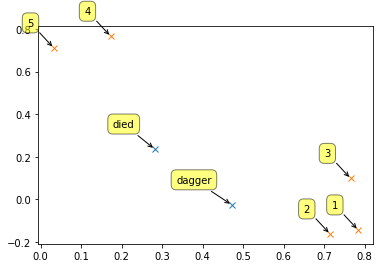

In [46]:
plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = ["died", "dagger"]
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()